In [13]:
import pandas as pd

In [14]:
a = pd.read_csv('LIAR-PLUS/dataset/train2.tsv', sep='\t', header=None)
a = a.drop(a.columns[0], axis=1)

In [15]:
a[1:2]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."


# Column 1

In [16]:
# column 1 analysis Check if any file names are identical
from collections import defaultdict
Q = defaultdict(lambda :0)
col1 = a[1]
for i in col1:
    Q[i]+=1

count=0
for j in Q.values():
    count += int(j!=1)
    
print('No of repeated index = {}'.format(count))

No of repeated index = 0


# Column 2 

{'mostly-true': 1961, 'pants-fire': 839, 'false': 1993, 'true': 1675, 'half-true': 2114, 'barely-true': 1653}


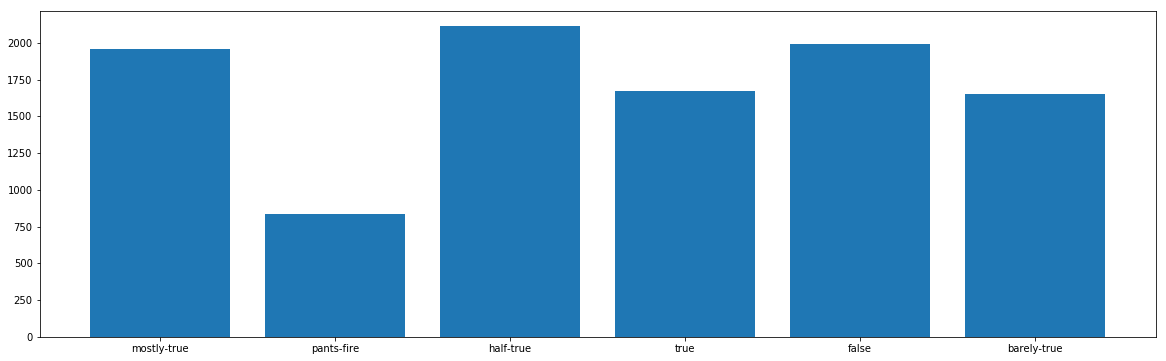

In [17]:
%matplotlib inline
from collections import defaultdict
import matplotlib.pyplot as plt
D = defaultdict(lambda : 0)
col2 = a[2]
for i in col2:
    D[i]+=1
    
print(dict(D))

def plot_from_dicts(D):
    plt.figure(figsize=(20,6))
    plt.bar(range(len(D)), list(D.values()), align='center')
    plt.xticks(range(len(D)), list(D.keys()))
    plt.show()

plot_from_dicts(D)

# Column 3

Index 428 Length 61 Right now one of our highest job growth sectors is Leisure and Hospitality. Weve added jobs that mostly fall within the restaurant and bar sector industry. These are not high-paying jobs, as the U.S. Department of Labor estimates this is an industry sector with the lowest average wages and the lowest proportion of its workforce earning minimum or subminimum wage jobs.


Index 1276 Length 60 When Donald Trump spoke in Phoenix, he looked the audience in the eye and he said no, were building a wall and were deporting everybody. He said, quote, they will all be gone. They will all be gone. This is one of the ones where you can go to the tape on it and see what Donald Trump has said.


Index 4192 Length 66 Let's pay attention to kids who are not going to college, which ends up being about 60 percent of the kids... and get them trained for the jobs that are there. Because, you know, there are auto mechanic jobs paying $50,000, $60,000 that they can't get filled. There are

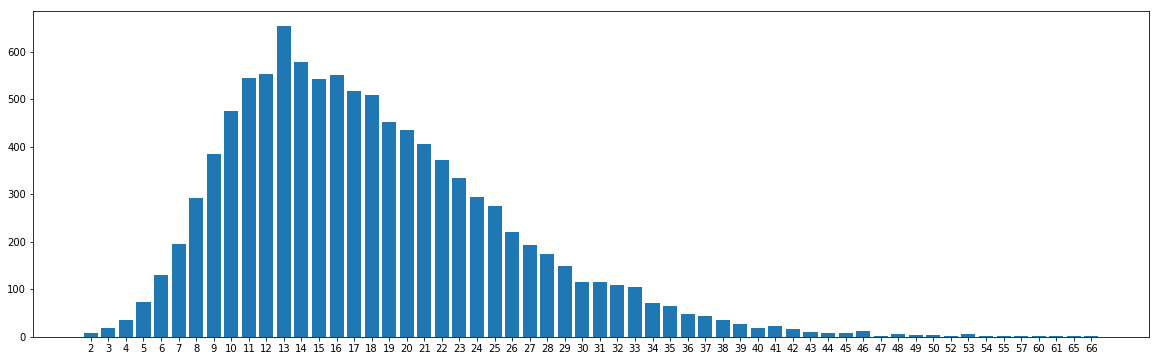

In [18]:
from collections import defaultdict
import matplotlib.pyplot as plt

A = defaultdict(lambda : 0)
col3 = a[3]
index=0

for string_ in col3:
    index+=1
    arr = string_.split(' ')
    length = len(arr)
    A[length]+=1
    if length>57:
        print('Index {} Length {}'.format(index,length), string_)
        print('\n')

print(dict(A))
plot_from_dicts(A)

# Column 4 -8, 14

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

K = defaultdict(lambda : 0)
M = defaultdict(lambda : 0)
col4 = a[4]
col5 = a[5]
col6 = a[6]
col7 = a[7]
col8 = a[8]
col14= a[14]

index=0

for s4 in col8:
    print(s4)
    string_= str(s4)
    #assert isinstance(s4,str), "Not a string!!"
    index+=1
    arr = string_.split(' ')
    length = len(arr)
    K[length]+=1
    M[string_]+=1
    
print(M)
plot_from_dicts(M)

# Column 15

In [ ]:
from collections import defaultdict
import matplotlib.pyplot as plt

B = defaultdict(lambda : 0)
col15 = a[15]
index=0
nan_count=0

for string_ in col15:
    #print(string_)
    string_=str(string_)
    if string_ == 'nan':
        nan_count+=1
    index+=1
    arr = string_.split(' ')
    length = len(arr)
    B[length]+=1
    
    if length>500 :
        print('Index {} Length {}'.format(index,length), string_)
        print('\n')

print(dict(B))
plot_from_dicts(B)

In [17]:
B

defaultdict(<function __main__.<lambda>>,
            {40: 1,
             43: 1,
             50: 1,
             70: 1,
             71: 1,
             73: 1,
             74: 1,
             79: 1,
             85: 1,
             92: 1,
             96: 1,
             105: 1})

# Analysis:
1) Removed all samples with corrupt column 3

2) Cleaned all samples with errors in column 15

In [11]:
import tensorflow as tf
import csv
with tf.gfile.Open('LIAR-PLUS/dataset/train2.tsv', "r") as f:
    reader = csv.reader(f, delimiter="\t", quotechar=None)
    lines = []
    for line in reader:
        lines.append(line)

In [45]:
lines[3]

['3',
 '1123.json',
 'false',
 'Health care reform legislation is likely to mandate free sex change surgeries.',
 'health-care',
 'blog-posting',
 '',
 '',
 'none',
 '7',
 '19',
 '3',
 '5',
 '44',
 'a news release',
 '"The release may have a point that Mikulskis comment could open the door to ""medically necessary"" coverage which conceivably may include sex-change operations. But it\'s unclear whether her amendment will remain in the legislation, and there\'s nothing specific in the legislation on sex-change procedures and nothing else solid that indicates such coverage will be provided. The news release cherry-picked a few fleeting references to gender and sexual orientation in completely unrelated contexts to argue that proposed health care legislation would mandate free sex-change surgeries (and allow them for illegal aliens, no less)."']

In [42]:
import tokenization

In [ ]:
for line in lines:
    
    temp = []
    temp.append(tokenization.convert_to_unicode(line[4]))
    temp.append(tokenization.convert_to_unicode(line[5]))
    temp.append(tokenization.convert_to_unicode(line[6]))
    temp.append(tokenization.convert_to_unicode(line[7]))
    temp.append(tokenization.convert_to_unicode(line[8]))
    temp.append(tokenization.convert_to_unicode(line[14]))
    temp.append(tokenization.convert_to_unicode(line[15]))
    text_b = ''
    for i in temp:
        text_b += i + ' [SEP] '
    print(text_b)

In [1]:
# if predictions.csv is the output, this can be used

import pandas as pd
a = pd.read_csv('test_results.tsv', sep='\t',header=None)
b = pd.read_csv('liar_classification/dataset/test.tsv', sep='\t',header=None)

import numpy as np
a = np.array(a)
preds_6 = np.argmax(a,axis=-1)
preds_2 = (preds_6>2.5)*1

def convert_labels_6(string):
    if string == 'pants-fire':
        label = 0
    elif string == 'false':
        label = 1
    elif string == 'barely-true':
        label = 2
    elif string == 'half-true':
        label = 3
    elif string == 'mostly-true':
        label = 4
    elif string == 'true':
        label = 5
    else:
        assert False, "Something Wrong!!"
    return label

def convert_labels_2(string):
    if string == 'pants-fire':
        label = 0
    elif string == 'false':
        label = 0
    elif string == 'barely-true':
        label = 0
    elif string == 'half-true':
        label = 1
    elif string == 'mostly-true':
        label = 1
    elif string == 'true':
        label = 1
    else:
        assert False, "Something Wrong!!"
    return label


labels_text = b[2]
labels_2 = []
labels_6 = []
for i in labels_text:
    labels_2.append(convert_labels_2(i))
    labels_6.append(convert_labels_6(i))
labels_2 = np.array(labels_2)
labels_6 = np.array(labels_6)


acc_6 = np.average(np.equal(preds_6,labels_6))
acc_2 = np.average(np.equal(preds_2,labels_2))
print("Test File results!")
print("Accuracy in 6 class classification: {} \nAccuracy in 2 class classification: {}".format(acc_6, acc_2))

Test File results!
Accuracy in 6 class classification: 0.3984189723320158 
Accuracy in 2 class classification: 0.6988142292490118
